<a href="https://colab.research.google.com/github/ak-org/notebooks/blob/master/pytorch_cifar10_CNNNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision 
import torchvision.transforms as transforms
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
print(torch.__version__)

1.2.0


In [3]:
transform = transforms.Compose([ 
     #transforms.RandomCrop(32, padding=4),
     #transforms.RandomHorizontalFlip(), 
     transforms.ToTensor(), #80% without it
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))# (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
     ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=50,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


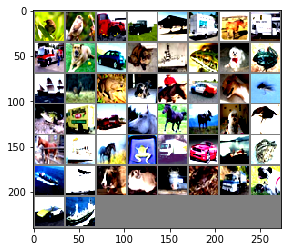

 bird  bird truck truck plane truck horse truck truck   dog   car   cat  ship  frog   dog  frog  ship  deer  frog   dog horse   car   dog plane  frog truck truck horse horse  deer   dog  bird horse  ship horse  frog truck   car  ship  frog  ship plane   dog   cat horse  frog truck   dog   car  ship


In [4]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(50)))

In [0]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [0]:
import torch.nn as nn 
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 64, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(64, 128, 5)
    self.fc1 = nn.Linear(128 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 128 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x 

#net = Net()
 

In [0]:
# Courtesy : https://zhenye-na.github.io/2018/09/28/pytorch-cnn-cifar10.html
class CNNNet(nn.Module):

    def __init__(self, num_classes=10):
        """CNN Builder."""
        super(CNNNet, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

net = CNNNet()

In [8]:
print(net)

CNNNet(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Dropout2d(p=0.05, inplace=False)
    (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [0]:
import torch.optim as optim 
crit = nn.CrossEntropyLoss()
optim = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)


In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device is ", device)
if torch.cuda.is_available() == True:
  print("Moving model to GPU")
  net = net.to(device)
  net = torch.nn.DataParallel(net)
  cudnn.benchmark = True
else:
  print("Unable to find matching CUDA")

Device is  cuda:0
Moving model to GPU


In [11]:
n_epochs = 20
for epoch in range(n_epochs):
  running_loss = 0.0
  for i, data in tqdm(enumerate(trainloader, 0)):
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    optim.zero_grad()
    outputs = net(inputs)
    loss = crit(outputs, labels)
    loss.backward()
    optim.step()
    running_loss += loss.item() 
  print("Epoch : {}, loss = {}".format(epoch, running_loss/1000))

1000it [00:39, 25.62it/s]
3it [00:00, 25.92it/s]

Epoch : 0, loss = 1.6634230437278748


1000it [00:39, 25.48it/s]
3it [00:00, 25.07it/s]

Epoch : 1, loss = 1.1037570388913154


1000it [00:39, 25.58it/s]
3it [00:00, 25.80it/s]

Epoch : 2, loss = 0.8634845144748687


1000it [00:39, 25.57it/s]
3it [00:00, 25.10it/s]

Epoch : 3, loss = 0.7205354877114296


1000it [00:39, 25.48it/s]
3it [00:00, 24.62it/s]

Epoch : 4, loss = 0.6243980720937252


1000it [00:39, 25.53it/s]
3it [00:00, 25.69it/s]

Epoch : 5, loss = 0.5433480205237865


1000it [00:39, 25.50it/s]
3it [00:00, 25.74it/s]

Epoch : 6, loss = 0.47902796456217767


1000it [00:39, 25.56it/s]
3it [00:00, 25.08it/s]

Epoch : 7, loss = 0.42342507050931455


1000it [00:39, 25.57it/s]
3it [00:00, 25.53it/s]

Epoch : 8, loss = 0.3709345006644726


1000it [00:39, 25.52it/s]
3it [00:00, 25.79it/s]

Epoch : 9, loss = 0.3221388177499175


1000it [00:39, 25.54it/s]
3it [00:00, 25.75it/s]

Epoch : 10, loss = 0.28105147729068997


1000it [00:39, 25.56it/s]
3it [00:00, 25.24it/s]

Epoch : 11, loss = 0.24156249861419202


1000it [00:39, 25.58it/s]
3it [00:00, 26.16it/s]

Epoch : 12, loss = 0.20593689749762417


1000it [00:39, 25.49it/s]
3it [00:00, 25.89it/s]

Epoch : 13, loss = 0.177689622849226


1000it [00:39, 25.54it/s]
3it [00:00, 25.99it/s]

Epoch : 14, loss = 0.14594865871407092


1000it [00:39, 25.56it/s]
3it [00:00, 25.85it/s]

Epoch : 15, loss = 0.12836234646476805


1000it [00:39, 25.56it/s]
3it [00:00, 25.90it/s]

Epoch : 16, loss = 0.10650905881542712


1000it [00:39, 25.57it/s]
3it [00:00, 25.25it/s]

Epoch : 17, loss = 0.08972877354267984


1000it [00:39, 25.54it/s]
3it [00:00, 25.84it/s]

Epoch : 18, loss = 0.07812151645030826


1000it [00:39, 25.51it/s]

Epoch : 19, loss = 0.06631430258741602


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [14]:
images[0].shape, classes[labels[0]]

(torch.Size([3, 32, 32]), 'cat')

In [15]:
images = images.to(device)
labels = labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print("Predicted : ", classes[predicted[0]])

Predicted :  cat


In [18]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 81 %


In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)        
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 85 %
Accuracy of   car : 92 %
Accuracy of  bird : 84 %
Accuracy of   cat : 66 %
Accuracy of  deer : 76 %
Accuracy of   dog : 57 %
Accuracy of  frog : 85 %
Accuracy of horse : 85 %
Accuracy of  ship : 94 %
Accuracy of truck : 80 %
